In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
import pandas as pd
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Resizing,Rescaling,RandomFlip,RandomRotation

# exporting data into tf 

In [28]:
# loading data set from directory to tensorflow data set 
Image_size=256          # seeing image seeing from image property
Batch_size=32           # making batch size to load dataset into batch 
channel=3               #  we have 3 channel 

In [29]:
dataset=image_dataset_from_directory( 
    "PlantVillage",
    shuffle=True,
    batch_size=Batch_size,
    image_size=(Image_size,Image_size)
 )      # directory name ,


Found 2152 files belonging to 3 classes.


In [30]:
class_name = dataset.class_names                    # how many class we have for example we have three class of image 
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [31]:
len(dataset)        # len data set 62 because our data we have is 68*32=2152

68

In [32]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)

(32, 256, 256, 3)


# To show image 

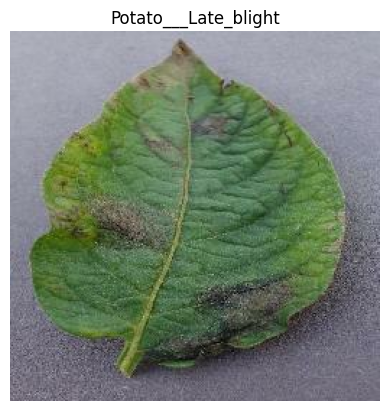

In [62]:
for image_batch,label_batch in dataset.take(1):    # for batch 1 ou of 68            .take to select data 
    #  print(image_batch[0].numpy())     # so its is in tensor need to put in numpy
    plt.imshow(image_batch[0].numpy().astype("uint8"))       # image is in float need convert into int
    plt.title(class_name[label_batch[0]])           # showing name of class of image with help of batch
    #print(label_batch[0])                           # hence we can see that label of image 
    plt.axis(False)
   
    

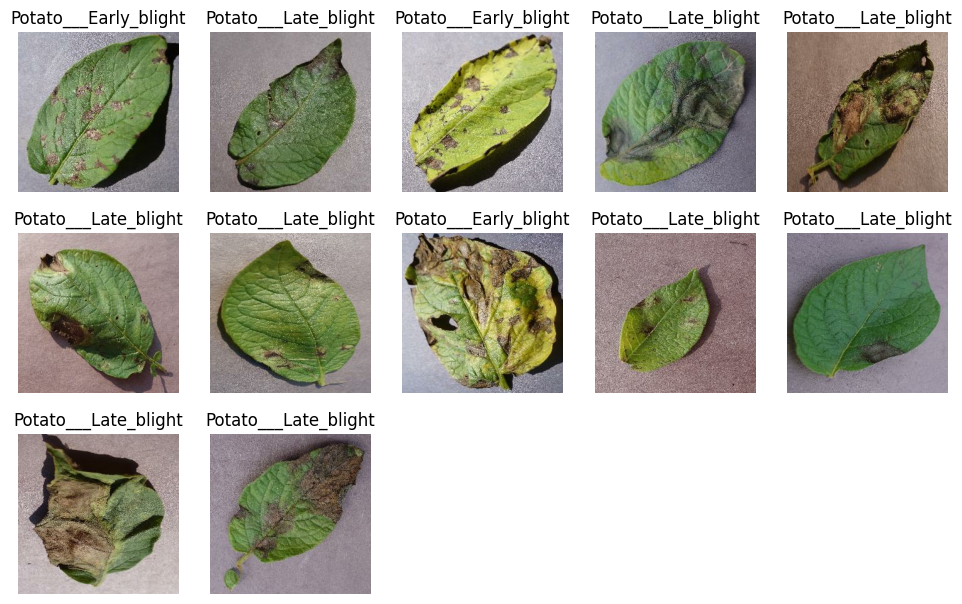

In [34]:
# for showing multiple image together 

plt.figure(figsize=(12,10))
for image_size,label_batch in dataset.take(2):   # for batch 2
    for i in range (12):
        plt.subplot(4,5,i+1)    # making the matrix like structure show image 
        plt.imshow(image_size[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis(False)
        

# To Divide Data in Trian And Test 

In [35]:
train_size=0.8 # that is 80 % o data 
test_size = 0.2  # that is 20 % of data 
validation =10  # of test data 
test=10      


In [36]:
train_data=0.8
len(dataset)*train_data   # it will show the 80% of total le of data 68 batch 80% of 68 batch is 54 batch

54.400000000000006

In [37]:
train_ds = dataset.take(54)     # train data 

In [38]:
test_data=0.2 
len(dataset)*test_data

13.600000000000001

In [39]:
# validition data 

# validation_data =0.10 of test_data

val_data=0.1
len(dataset)*val_data
val_data=dataset.take(6)

# making function divide data into train ,test and validation

tf.data.Dataset does not support len(ds), so you cannot get its size using len().
.cardinality() is the correct method to get the number of elements in a dataset.
It is useful for splitting datasets into training, validation, and test sets.

In [40]:


def get_train_val_test_split(ds, train_size=0.8, val_size=0.1, shuffle=True, shuffle_size=10000):
    ds_size = ds.cardinality().numpy()  # Get dataset size safely       
    

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)  # Shuffle dataset

    train_ds_size = int(ds_size * train_size)
    val_ds_size = int(ds_size * val_size)

    train_data = ds.take(train_ds_size)  # First portion for training
    remaining_data = ds.skip(train_ds_size)  # Skip train data
    val_data = remaining_data.take(val_ds_size)  # Take validation data
    test_data = remaining_data.skip(val_ds_size)  # Remaining data as test

    return train_data, val_data, test_data



train_data, val_data, test_data = get_train_val_test_split(dataset)

# Checking sizes
print(f"Train dataset size: {train_data.cardinality().numpy()}")
print(f"Validation dataset size: {val_data.cardinality().numpy()}")
print(f"Test dataset size: {test_data.cardinality().numpy()}")


Train dataset size: 54
Validation dataset size: 6
Test dataset size: 8


# using cache and prefatch to make data work more smoth and faster 

# Cache and Prefetch in TensorFlow (tf.data.Dataset)
# Caching and prefetching are performance optimization techniques for tf.data.Dataset. 
# They speed up data loading, reduce bottlenecks, and improve training efficienc

In [41]:
train_ds=train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) # created for train data

In [42]:
test_ds=test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [43]:
val_ds=val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# preproecssing of data  
# mean :-    # Normalizes pixel values to [0,1]      important step in cnn


In [44]:
resize_rescale=Sequential([
    Resizing(Image_size,Image_size),
    Rescaling(1.0/255)           # Normalizes pixel values to [0,1]
]) 

# data augmnetation


# data augmentaion dividing the same image into difrrent shape horizontal and vertical


In [45]:
data_augmentaion= Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2)
])

# makin cnn model 

In [46]:
# loading data set from directory to tensorflow data set 
Image_size=256          # seeing image seeing from image property
Batch_size=32           # making batch size to load dataset into batch 
channel=3               #  we have 3 channel 


In [47]:
Input_shape=(Batch_size,image_size,image_size,channel)

model = Sequential(
    [
        resize_rescale,
        data_augmentaion,
        layers.Conv2D(32,(3,3),activation="relu",padding="valid",input_shape=Input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3),activation="relu",padding="valid"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3),activation="relu",padding="valid"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3),activation="relu",padding="valid"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3),activation="relu",padding="valid"),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64,activation="relu"),
        layers.Dense(3,activation="softmax")

    ]
)
model.build(input_shape=Input_shape)

In [48]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_6 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(
    optimizer="Adam",
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [50]:
history=model.fit(train_ds,batch_size=Batch_size,verbose=1,validation_data=val_data,epochs=50)

Epoch 1/50


c:\Users\Om Soni\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:678: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


54/54 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.4928 - loss: 0.9426 - val_accuracy: 0.7031 - val_loss: 0.7565
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.7294 - loss: 0.6978 - val_accuracy: 0.8229 - val_loss: 0.4936
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.8202 - loss: 0.4348 - val_accuracy: 0.8281 - val_loss: 0.4119
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.8992 - loss: 0.2763 - val_accuracy: 0.9323 - val_loss: 0.1969
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.9311 - loss: 0.1708 - val_accuracy: 0.8958 - val_loss: 0.2449
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.9379 - loss: 0.1690 - val_accuracy: 0.9375 - val_loss: 0.1432
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9471 - loss: 0.1382 - val_accuracy: 0.9635 - val_loss: 0.1310
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9531 - loss: 0.1312 - val_accuracy: 0.9583 - val_loss: 0.09

In [51]:
history.history

{'accuracy': [0.48495370149612427,
  0.7488425970077515,
  0.8402777910232544,
  0.9137731194496155,
  0.9253472089767456,
  0.9409722089767456,
  0.9508101940155029,
  0.9554398059844971,
  0.9577546119689941,
  0.9467592835426331,
  0.9577546119689941,
  0.9646990895271301,
  0.9756944179534912,
  0.9774305820465088,
  0.9704861044883728,
  0.9710648059844971,
  0.9745370149612427,
  0.9855324029922485,
  0.9849537014961243,
  0.9884259104728699,
  0.9855324029922485,
  0.9855324029922485,
  0.9728009104728699,
  0.9664351940155029,
  0.9791666865348816,
  0.9895833134651184,
  0.9924768805503845,
  0.9791666865348816,
  0.9872685074806213,
  0.9872685074806213,
  0.9936342835426331,
  0.9953703880310059,
  0.9953703880310059,
  0.9918981194496155,
  0.9913194179534912,
  0.9855324029922485,
  0.9826388955116272,
  0.9930555820465088,
  0.9947916865348816,
  0.9971064925193787,
  0.9965277910232544,
  0.9878472089767456,
  0.9803240895271301,
  0.9913194179534912,
  0.996527791023254

In [52]:
model.evaluate(test_data)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - accuracy: 1.0000 - loss: 0.0033


[0.004331634379923344, 1.0]

# prediction on single image 

In [72]:
import numpy as np

first image to predict
actual image name Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
prediction image namme :  Potato___Late_blight


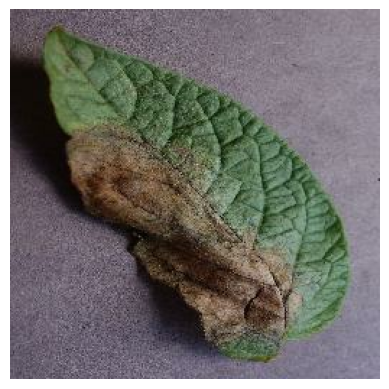

In [ ]:
for image_batch,label_batch in test_data.take(1):
    first_img=image_batch[0].numpy().astype("uint8")
    first_label=label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_img)
    print("actual image name",class_name[first_label])
    batch_predict=model.predict(image_batch)
    print("prediction image namme : ",class_name[np.argmax(batch_predict[0])])
   
    plt.axis(False)

# saving the model


In [82]:
import os

# Define save directory
model_dir = r"C:\Users\Om Soni\OneDrive\Desktop\potato diecese prediction\models"
os.makedirs(model_dir, exist_ok=True)  # Ensure directory exists

# Define model version
model_version = 1
save_path = os.path.join(model_dir, f"model_v{model_version}.keras")  # Add .keras extension

# Save the model
model.save(save_path)
print(f"Model saved at: {save_path}")


Model saved at: C:\Users\Om Soni\OneDrive\Desktop\potato diecese prediction\models\model_v1.keras


In [83]:
from tensorflow.keras.models import load_model

loaded_model = load_model(os.path.join(model_dir, f"model_v{model_version}.keras"))
print("Model loaded successfully!")


Model loaded successfully!
